# Task 5: 

## Part 1
Analyze the differences between the sexes by age in Ireland.
Include: 
- Weighted mean age (by sex) 
- Difference between the sexes by age

Author: Irene Celebrin

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get the data from https://data.cso.ie/ API 
# See: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en')

# show first 5 rows
df.head(5)

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
0,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,IE0,Ireland,Number,5149139
1,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,61968
2,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1433-13a3-e055-000000000001,Dublin City Council,Number,592713
3,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-149f-13a3-e055-000000000001,Dún Laoghaire Rathdown County Council,Number,233860
4,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-14a0-13a3-e055-000000000001,Fingal County Council,Number,330506


In [3]:
# get a list of the columns to identify unneeded columns: 
headers = list(df)
headers

['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'CensusYear',
 'C02199V02655',
 'Sex',
 'C02076V03371',
 'Single Year of Age',
 'C03789V04537',
 'Administrative Counties',
 'UNIT',
 'VALUE']

In [4]:
# remove unneeded columns. See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 
col_to_drop = ['STATISTIC', 'Statistic Label','TLIST(A1)','CensusYear','C02199V02655','C02076V03371','C03789V04537','Administrative Counties','UNIT']
df = df.drop(columns=col_to_drop)

df.head(5)


,Sex,Single Year of Age,VALUE
0,Both sexes,All ages,5149139
1,Both sexes,All ages,61968
2,Both sexes,All ages,592713
3,Both sexes,All ages,233860
4,Both sexes,All ages,330506


In [5]:
# remove unneeded rows
# remove rows where 'Single Year of Age' is 'All ages', and 'Sex' is 'Both sexes'
df = df[df['Single Year of Age'] != 'All ages']
df = df[df['Sex'] != 'Both sexes']

df


,Sex,Single Year of Age,VALUE
3296,Male,Under 1 year,29610
3297,Male,Under 1 year,346
3298,Male,Under 1 year,3188
3299,Male,Under 1 year,1269
3300,Male,Under 1 year,2059
...,...,...,...
9787,Female,100 years and over,7
9788,Female,100 years and over,9
9789,Female,100 years and over,12
9790,Female,100 years and over,31


In [6]:
# re-format year value for "Under 1 year" to 0, remove non-numeric characters
df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0')
df['Single Year of Age'] = df['Single Year of Age'].replace('[^\d]','', regex=True)

# verify value types to make sure numerical values are integers 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 3296 to 9791
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sex                 6464 non-null   object
 1   Single Year of Age  6464 non-null   object
 2   VALUE               6464 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.0+ KB


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_52267/2387664835.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Single Year of Age'] = df['Single Year of Age'].replace('[^\d]','', regex=True)


In [7]:
# make 'Single Year of Age' is an integer
df['Single Year of Age'] = df['Single Year of Age'].astype(int)

df.tail(5)


,Sex,Single Year of Age,VALUE
9787,Female,100,7
9788,Female,100,9
9789,Female,100,12
9790,Female,100,31
9791,Female,100,7


In [8]:
# create array for age by sex
male_age = df[df['Sex'] == 'Male']['Single Year of Age']
female_age = df[df['Sex'] == 'Female']['Single Year of Age']
# create arrays for weights by sex 
male_wt = df[df['Sex'] == 'Male']['VALUE']
female_wt = df[df['Sex'] == 'Female']['VALUE']

In [9]:
# weighted_age_average by sex. See: https://numpy.org/doc/2.1/reference/generated/numpy.average.html 

male_weighted_age = np.average(male_age, weights = male_wt)
female_weighted_age = np.average(female_age, weights = female_wt)


print(f"Men's weighted mean age:\t{male_weighted_age:.2f} years\nWomen's weighted mean age:\t{female_weighted_age:.2f} years")

Men's weighted mean age:	37.74 years
Women's weighted mean age:	38.94 years


In [10]:
# View population by sex and age group. 
# create pivot table with age as index and sex as columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html 
df_analysis = df.pivot_table(
    values='VALUE',
    index='Single Year of Age',
    columns='Sex',
    aggfunc='sum'   # sum across duplicates (e.g., regions)
)

# Save to csv 
df_analysis.to_csv('05_population_pivot.csv')

In [11]:
# show pivot table
df_analysis

Sex,Female,Male
Single Year of Age,,
0,56372,59220
1,55090,57750
2,57948,60472
3,58966,62002
4,59638,63372
...,...,...
96,1912,654
97,1464,434
98,984,260


Single Year of Age
0      56372
1      55090
2      57948
3      58966
4      59638
       ...  
96      1912
97      1464
98       984
99       672
100     1168
Name: Female, Length: 101, dtype: int64

Text(0.5, 1.0, 'Age Distribution by Sex')

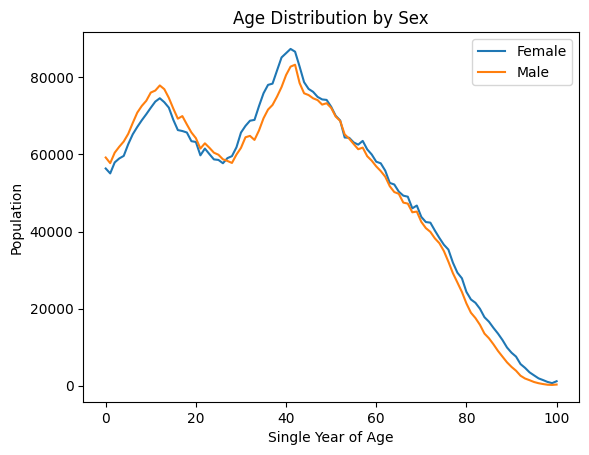

In [ ]:
# plot age difference by sex 

# create arrays for the axes 
age = df_analysis.index
female_population = df_analysis['Female']
male_population = df_analysis['Male']

# plot the data 
fig, ax = plt.subplots()
ax.plot(age, female_population, label='Female')
ax.plot(age, male_population, label='Male')
ax.set_xlabel('Single Year of Age')
ax.set_ylabel('Population')
plt.legend()
plt.title('Age Distribution by Sex')

In [55]:
# Analyse population difference

# Calculate total male and female population, and population difference by sex 
total_male_population = df_analysis['Male'].sum()
total_female_population = df_analysis['Female'].sum()

print(f'Total male population in Ireland:\t\t{total_male_population}')
print(f'Total female population in Ireland:\t\t{total_female_population}')
print(f'Population difference by age (male - female):\t{total_male_population - total_female_population}')

Total male population in Ireland:		5089098
Total female population in Ireland:		5209180
Population difference by age (male - female):	-120082


In [57]:
# Add population difference to the pivot table
df_analysis['Difference'] = df_analysis['Male'] - df_analysis['Female']

# Show population difference 
df_analysis.head(5)

# Save to csv 
df_analysis.to_csv('05_population_pivot_with_difference.csv')

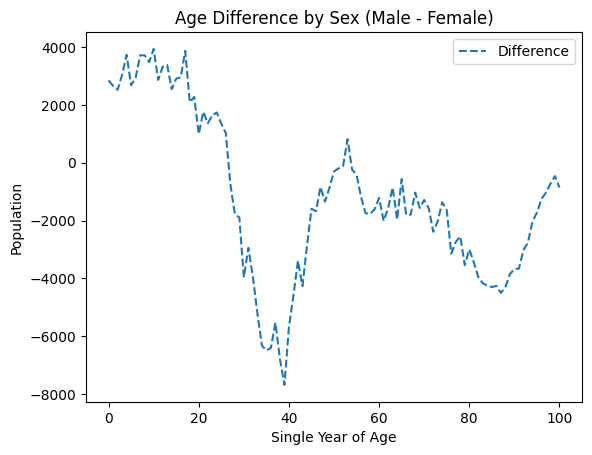

In [58]:
# Plot population difference
fig, ax = plt.subplots()
ax.plot(age, df_analysis['Difference'], label='Difference', linestyle='--')
ax.set_xlabel('Single Year of Age')
ax.set_ylabel('Population')
plt.legend()
plt.title('Age Difference by Sex (Male - Female)')
plt.show()